In [4]:
#we import libraries as necessary
import pandas as pd
import re
import src.cleaning as clean
import src.manipulating_df as man
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#we wil import our previously cleaned worldwide_emissions cvs file to take conclusions out of it
world_emissions=man.open_cvs()
#world_emissions file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
world_emissions


In [159]:
# we check that the DataFrame exportation is correct
world_emissions.head(20)

,Year,CO2_emissions,Year_interval
0,1751,0.00,1750
1,1752,0.00,1750
2,1753,0.00,1750
3,1754,0.00,1750
4,1755,0.00,1750
5,1756,0.01,1750
6,1757,0.01,1750
7,1758,0.01,1750
8,1759,0.01,1750
9,1760,0.01,1750


#### We want to see CO2 total emission through History, and on average by year

In [110]:
world_emissions["Year_interval"] =pd.cut(world_emissions['Year'],[1750,1800,1850,1900,1950,2000,2050],labels=['1750','1800','1850','1900','1950','2000'])
world_emissions_years=world_emissions.groupby(['Year_interval']).agg({"CO2_emissions":["sum","mean"]})
clean.rounding(world_emissions_years)

CO2_emissions        
                        sum    mean
Year_interval                      
1750                   1.61    0.03
1800                  10.90    0.22
1850                  92.28    1.85
1900                 637.08   12.74
1950                2791.90   55.84
2000                2216.00  130.35

<Figure size 576x576 with 0 Axes>

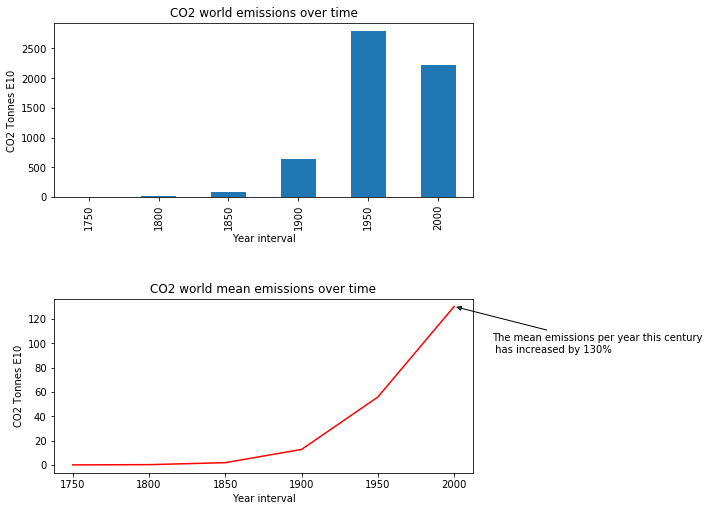

<Figure size 576x576 with 0 Axes>

In [126]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
world_emissions_years['CO2_emissions',  'sum'].plot.bar(xlabel='Year interval',ylabel='CO2 Tonnes E10',title='CO2 world emissions over time')

plt.tight_layout(pad=5.50)
plt.subplot(2,1,2)
world_emissions_years['CO2_emissions',  'mean'].plot(xlabel='Year interval',ylabel='CO2 Tonnes E10',title='CO2 world mean emissions over time',c='r')
plt.annotate('The mean emissions per year this century \n has increased by 130%',xy=(5,130.35), xytext=(5.5,100),arrowprops={'arrowstyle': '-|>'}, va='center')
plt.figure(figsize=(8,8))


### CO2 emissions produced by vehicles worldwide

In [28]:
#we wil import our previously cleaned vehicles cvs file to take conclusions out of it
vehicles=man.open_cvs()
#vehicles file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
vehicles


In [100]:
vehicles_emissions=vehicles.groupby(['Vehicle_Class']).agg({'CO2_Emissions(g/km)':'mean'})
clean.rounding(vehicles_emissions)
vehicles_emissions=vehicles_emissions.sort_values(by='CO2_Emissions(g/km)',ascending=False)
vehicles_emissions

,CO2_Emissions(g/km)
Vehicle_Class,
VAN - PASSENGER,397.21
VAN - CARGO,361.50
SUV - STANDARD,304.84
PICKUP TRUCK - STANDARD,301.51
PICKUP TRUCK - SMALL,278.97
TWO-SEATER,277.45
FULL-SIZE,263.32
MINIVAN,262.31
SUBCOMPACT,246.45


<Figure size 720x576 with 0 Axes>

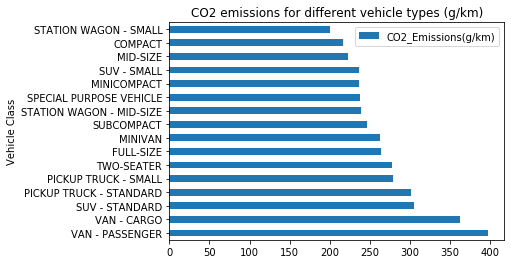

It can be seen that the most inefficient vehicles are vans, with great difference.
In general terms, it could be said that the bigger the car, the less efficient


In [104]:
plt.figure(figsize=(10,8))
vehicles_emissions.plot.barh(xlabel='Vehicle Class',title='CO2 emissions for different vehicle types (g/km)')
plt.show()
print('It can be seen that the most inefficient vehicles are vans, with great difference.\nIn general terms, it could be said that the bigger the car, the less efficient')

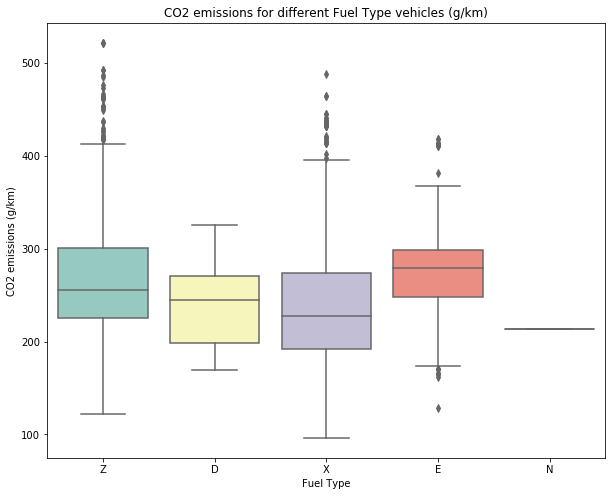

As it can be seen, the highest emissions are produced by Ethanol vehicles, where data is fairly concentrated


In [105]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Fuel_Type", y="CO2_Emissions(g/km)", data=vehicles, palette="Set3")
plt.title('CO2 emissions for different Fuel Type vehicles (g/km)')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 emissions (g/km)')
plt.show()
print('As it can be seen, the highest emissions are produced by Ethanol vehicles, where data is fairly concentrated')

In [85]:
mean_emission=round(vehicles['CO2_Emissions(g/km)'].mean(),2)
print(f'The mean CO2 emission for a vehicle is {mean_emission} g/km')

The mean CO2 emission for a vehicle is 250.58 g/km


### Number of registered vehicles worldwide

In [23]:
#we wil import our previously cleaned register cvs file to take conclusions out of it
register=man.open_cvs()
#register file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
register


In [96]:
# we check that the DataFrame exportation is correct
registerd_vehicles=register['Number_of_registered_vehicles'].sum()
print(f'There were {registerd_vehicles} registered vehicles in the world in 2016')

There were 1267160207 registered vehicles in the world in 2016


### European Comission Expects ZERO CO2 emissions in 2050